In [36]:
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage

In [37]:
f = h5py.File('snapshot_600.hdf5', 'r')
electron_abundance = f['PartType0']['ElectronAbundance'].value
internal_energy = f['PartType0']['InternalEnergy'].value
density = f['PartType0']['Density'].value
mass = f['PartType0']['Masses'].value
density = density * 10**10
mass = mass * 10**10
print(f['PartType0'].keys())

<KeysViewHDF5 ['Coordinates', 'Density', 'DensityGradient', 'ElectronAbundance', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'InternalEnergy', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'Velocities', 'VelocityCurl', 'VelocityDivergence', 'Vorticity']>


<ipython-input-37-78da60e38b3f>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  electron_abundance = f['PartType0']['ElectronAbundance'].value
<ipython-input-37-78da60e38b3f>:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  internal_energy = f['PartType0']['InternalEnergy'].value
<ipython-input-37-78da60e38b3f>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  density = f['PartType0']['Density'].value
<ipython-input-37-78da60e38b3f>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  mass = f['PartType0']['Masses'].value


In [38]:
#calculating mean molecular weight
m_p = 1.673 * 10**(-24)
molecular_weight = (4)/(1 + 3*0.76 + electron_abundance * 4 * 0.76)
molecular_weight = molecular_weight*m_p

#calculating temperature
internal_energy = internal_energy/(1.38*10**(-16))
constant = ((5/3-1)*(10**10))
temperature = molecular_weight * constant * internal_energy

In [39]:
#hydrogen number density: calculated by dividing the mass density of the gas in each cell by hydrogen’s mass. 
n_density = density / (1.67*10**(-24))

In [40]:
temperature = np.log10(temperature)
n_density = np.log10(n_density)

<ipython-input-41-48489020021c>:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(graph.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')


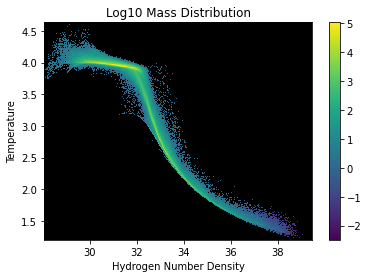

In [41]:
nbins = 500
xedges = np.linspace(min(n_density),max(n_density), num = nbins)
yedges = np.linspace(min(temperature),max(temperature), num = nbins)

#current_cmap = matplotlib.cm.get_cmap()
#current_cmap.set_bad(color='black')
#cmap=current_cmap,

graph, xbins, ybins = np.histogram2d(n_density, temperature, bins=(xedges, yedges), weights = mass)
plt.imshow(np.log10(graph.T), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')
plt.xlabel("Hydrogen Number Density")
plt.ylabel("Temperature")
plt.title("Log10 Mass Distribution")
plt.colorbar()
plt.savefig('N_Density_600')
plt.show()